37902 Foundation of Advanced Quantitative Marketing

Li Liu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
pd.options.display.max_colwidth = 1000

In [2]:
df=pd.read_excel("Yogurt100N.csv.xlsx")
df.describe()
df.head()

,Pan I.D.,Expend $,Income,HH Size,IPT,Quantity,Brand 1,Brand 2,Brand 3,Brand 4,Feature 1,Feature 2,Feature 3,Feature 4,Price 1,Price 2,Price 3,Price 4,PanelistFirstObs
0,1,40.900002,9,2,5,2,0,0,0,1,0,0,0,0,0.108,0.081,0.061,0.079,1
1,1,16.809999,9,2,5,2,0,1,0,0,0,0,0,0,0.108,0.098,0.064,0.075,0
2,1,4.060000,9,2,1,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
3,1,34.459999,9,2,4,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
4,1,8.390000,9,2,7,2,0,1,0,0,0,0,0,0,0.125,0.098,0.049,0.079,0


### Exploratory Data Analysis

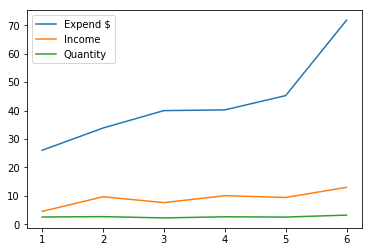

In [26]:
HH=df.groupby('HH Size')['Expend $','Income','Quantity'].mean()
plt.plot(HH['Expend $'])
plt.plot(HH['Income'])
plt.plot(HH['Quantity'])
plt.legend()
plt.show()

As household size increases, average expenditure increases, income peaks at the largest householdsize, and quantity purchased doesn't change much.

In [4]:
visit=df.groupby('Pan I.D.')['Pan I.D.'].count()
visit.describe()

count    100.000000
mean      24.300000
std       29.455839
min        4.000000
25%        9.000000
50%       15.000000
75%       25.000000
max      185.000000
Name: Pan I.D., dtype: float64

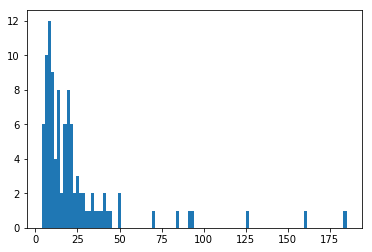

In [27]:
plt.hist(visit,bins=100)
plt.show()

Customers on average have 24 shopping records, with the most frequent visit to be 185 and least frequent visit to be 4. 

75% of the customers shop fewer than 25 times.

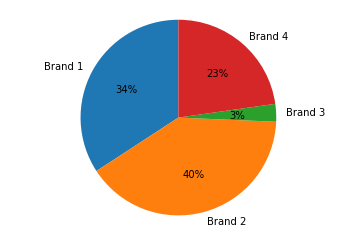

In [29]:
cts=[sum(df['Brand 1']),sum(df['Brand  2']),sum(df['Brand 3']),sum(df['Brand 4'])]
labels='Brand 1','Brand 2','Brand 3','Brand 4'
fig1, ax1 = plt.subplots()
ax1.pie(cts, labels=labels, autopct='%1.0f%%',startangle=90)
ax1.axis('equal') 
plt.show()

In this dataset, Brand 2 has the highest demand and Brand 3 has the lowest demand.

### Logit Model 


In [30]:
df.columns

Index(['Pan I.D.', 'Expend $', 'Income', 'HH Size', 'IPT', 'Quantity',
       'Brand 1', 'Brand  2', 'Brand 3', 'Brand 4', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Price 1', 'Price 2', 'Price 3', 'Price 4',
       'PanelistFirstObs'],
      dtype='object')

In [31]:
def crit(params):

    a1,a2,a3,bf,bp=params
    ev1=np.exp(a1+bf*df['Feature 1']+bp*df['Price 1'])
    ev2=np.exp(a2+bf*df['Feature 2']+bp*df['Price 2'])
    ev3=np.exp(a3+bf*df['Feature 3']+bp*df['Price 3'])
    ev4=np.exp(0+bf*df['Feature 4']+bp*df['Price 4'])
    denom=ev1+ev2+ev3+ev4
    pc=(ev1*df['Brand 1']+ev2*df['Brand  2']+ev3*df['Brand 3']+ev4*df['Brand 4'])/denom
    Inpc=np.log(pc)
    LL=np.sum(Inpc)
    return -LL

In [46]:
a1,a2,a3,bf,bp=1,1,1,1,1 #Initalization
params_init = np.array([a1,a2,a3,bf,bp])
results = opt.minimize(crit, params_init)
a1,a2,a3,bf,bp = results.x
print(" a1 (Intrinsic brand preference for Brand 1):",a1,"\n",
      "a2 (Intrinsic brand preference for Brand 2):",a2,"\n",
      "a3 (Intrinsic brand preference for Brand 3):",a3,"\n",
      "bf (Coefficients for feature variable):",bf,"\n",
      "bp (Coefficients for price variable):",bp,"\n",
      "Maximized Log Likelihood:",-results.fun)

 a1 (Intrinsic brand preference for Brand 1): 1.3877493848693059 
 a2 (Intrinsic brand preference for Brand 2): 0.6435046305879636 
 a3 (Intrinsic brand preference for Brand 3): -3.0861119572117355 
 bf (Coefficients for feature variable): 0.4874149107851659 
 bp (Coefficients for price variable): -37.057782766093105 
 Maximized Log Likelihood: -2658.5566975071233


The identified logit model for choosing each of the four brands are:

\begin{equation}
  p(Brand 1) = \frac{\text{exp}(1.38 + 0.48*\text{feature 1} -37*\text{price 1})}{\text{exp}(1.38 + 0.48*\text{feature 1} -37*\text{price 1})+\text{exp}(0.64 + 0.48*\text{feature 2} -37*\text{price 2})+\text{exp}(-3+ 0.48*\text{feature 3} -37*\text{price 3})+\text{exp}(0.48*\text{feature 4} -37*\text{price 4})} 
\end{equation}

\begin{equation}
  p(Brand 2) = \frac{\text{exp}(0.64+ 0.48*\text{feature 2} -37*\text{price 2})}{\text{exp}(1.38 + 0.48*\text{feature 1} -37*\text{price 1})+\text{exp}(0.64 + 0.48*\text{feature 2} -37*\text{price 2})+\text{exp}(-3+ 0.48*\text{feature 3} -37*\text{price 3})+\text{exp}(0.48*\text{feature 4} -37*\text{price 4})} 
\end{equation}

\begin{equation}
  p(Brand 3) = \frac{\text{exp}(-3 + 0.48*\text{feature 3} -37*\text{price 3})}{\text{exp}(1.38 + 0.48*\text{feature 1} -37*\text{price 1})+\text{exp}(0.64 + 0.48*\text{feature 2} -37*\text{price 2})+\text{exp}(-3+ 0.48*\text{feature 3} -37*\text{price 3})+\text{exp}(0.48*\text{feature 4} -37*\text{price 4})} 
\end{equation}

\begin{equation}
  p(Brand 4) = \frac{\text{exp}(0.48*\text{feature 4} -37*\text{price 4})}{\text{exp}(1.38 + 0.48*\text{feature 1} -37*\text{price 1})+\text{exp}(0.64 + 0.48*\text{feature 2} -37*\text{price 2})+\text{exp}(-3+ 0.48*\text{feature 3} -37*\text{price 3})+\text{exp}(0.48*\text{feature 4} -37*\text{price 4})} 
\end{equation}

### The variance-covariance matrix of ML estimates

In [10]:
results.hess_inv

array([[ 7.48200844e-03,  2.20685323e-03, -2.96670164e-03,
        -2.16608416e-03, -1.53854223e-01],
       [ 2.20685323e-03,  3.03416481e-03,  1.56732482e-03,
        -1.41506984e-04, -1.15580067e-02],
       [-2.96670164e-03,  1.56732482e-03,  2.08265167e-02,
         1.81403601e-03,  1.67282482e-01],
       [-2.16608416e-03, -1.41506984e-04,  1.81403601e-03,
         1.27119528e-02,  6.74989276e-02],
       [-1.53854223e-01, -1.15580067e-02,  1.67282482e-01,
         6.74989276e-02,  5.42571345e+00]])

From Davidson and MacKinnon (2004, Sec. 10.4):

VCV: variance-covariance matrix of the maximum likelihood estimates


The Hessian is a matrix of second derivatives of the log likelihood function with respect to the parameters being chosen.

$$ \hat{VCV}_H(\hat{\theta}) =-H^{-1}(\hat{\theta}) \quad\text{from max prob} $$

Equivalently,

$$ \hat{VCV}_H(\hat(\theta)) = OffDiag(-1) H^{-1}(\hat{\theta}) \quad\text{from min prob} $$


In [11]:
OffDiagNeg = np.array([[1, -1, -1, -1, -1], [-1, 1, -1, -1, -1],
                       [-1, -1, 1, -1, -1],[1, -1, -1, 1, -1],[1, -1, -1, -1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
print('VCV(MLE) = ', vcv_mle)

VCV(MLE) =  [[ 7.48200844e-03 -2.20685323e-03  2.96670164e-03  2.16608416e-03
   1.53854223e-01]
 [-2.20685323e-03  3.03416481e-03 -1.56732482e-03  1.41506984e-04
   1.15580067e-02]
 [ 2.96670164e-03 -1.56732482e-03  2.08265167e-02 -1.81403601e-03
  -1.67282482e-01]
 [-2.16608416e-03  1.41506984e-04 -1.81403601e-03  1.27119528e-02
  -6.74989276e-02]
 [-1.53854223e-01  1.15580067e-02 -1.67282482e-01 -6.74989276e-02
   5.42571345e+00]]


In [42]:
#The square root of diagonal elements are standard errors 
stderr_a1_mle = np.sqrt(vcv_mle[0,0])
stderr_a2_mle = np.sqrt(vcv_mle[1,1])
stderr_a3_mle = np.sqrt(vcv_mle[2,2])
stderr_bf_mle = np.sqrt(vcv_mle[3,3])
stderr_bp_mle = np.sqrt(vcv_mle[4,4])
print('Standard error for a1 estimate = ', stderr_a1_mle)
print('Standard error for a2 estimate = ', stderr_a2_mle)
print('Standard error for a3 estimate = ', stderr_a3_mle)
print('Standard error for bf estimate = ', stderr_bf_mle)
print('Standard error for bp estimate = ', stderr_bp_mle)

Standard error for a1 estimate =  0.08649860370236154
Standard error for a2 estimate =  0.055083253479824096
Standard error for a3 estimate =  0.14431395169240108
Standard error for bf estimate =  0.11274729600339733
Standard error for bp estimate =  2.32931609089431


The sample size for choosing Brand 2 (975) is much larger than the size for Brand 3 (71). Since standard error is inversely proportional to the sample size, the S.E for a2 (0.055) is much smaller than the S.E for a1 (0.14).